<a href="https://colab.research.google.com/github/Seboldju/JS_JR_NK_Softwareentwicklung-Tankstellen/blob/main/Neuer_Versuch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
id = "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7" # ID of the fuel station of interest (Aral Tankstelle Lochäckerstraße 294)
ids_pf = ["0be32f00-8ff4-45bf-bb4c-1588d6e03aa1", "0dc6786a-38e4-4576-8848-335975dea87b", "3fe8dc63-1663-430f-bcc3-5bdbf281d3af", "4153a547-046a-410c-a575-968f21f1ce66", "51d4b5ba-a095-1aa0-e100-80009459e03a", "615f2d73-5214-47f2-8691-e4a8134380bb", "6657358a-cf8c-4d8a-b4ec-a835271041ac","71ee41a5-8e67-4c50-85ab-37b95f1ec76e", "7a8d7a4a-a898-48c1-9420-f4a843d3d32e", "85d87996-9667-4563-be19-7dd758a9a4a0", "8cf0e749-5ebc-4e51-a968-0a40c9d6ac9f","94fb812e-dae2-4d1e-c4c3-d7837b468dab", "99f5fdc2-80d8-4c38-aa04-6295d0d78f96", "a839b4f0-ec0d-474a-a839-4ada95a6ca8a", "b0e03550-8c80-4917-92e7-db40e975d9f2", "d6e30bca-f474-4e02-aef2-56bd5c2545d9", "fbc4af15-1e1d-46ba-9a44-80c47900f3a5", "22375adc-ed7e-423b-8191-2cd266f6bcd6", "35d5f441-d930-4993-adf4-ee1abdf14000", "51d4b626-a095-1aa0-e100-80009459e03a", "51d4b6b4-a095-1aa0-e100-80009459e03a", "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7"]
days = 30 # Number of days of interest, counting backwards from today,
# above 200 days requires local engine or Colab Pro, runs out of memory in free version

In [3]:
import datetime
import pandas as pd
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



In [4]:
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
print(yesterday)

2024-06-12


In [5]:
twodaysago = today - datetime.timedelta(days=2)

In [6]:
def linkFromDate(date) :
  link_prefix = "https://dev.azure.com/tankerkoenig/362e70d1-bafa-4cf7-a346-1f3613304973/_apis/git/repositories/0d6e7286-91e4-402c-af56-fa75be1f223d/items?path=/prices/"
  link_datepart = "2024/04/2024-04-23"
  link_datepart = date.strftime('%Y/%m/%Y-%m-%d')
  link_postfix = "-prices.csv"
  link = link_prefix + link_datepart + link_postfix
  return link

In [7]:
link = linkFromDate(twodaysago)

In [8]:
def downloadData(url) :
  command = ["wget", "-O","prices.csv",url]
  result = subprocess.run(command, capture_output=True, text=True)
  # Print the output from the command
  # print("Output:")
  # print(result.stdout)
  # Check for errors
  if result.stderr:
    print("Error:")
    print(result.stderr)

In [9]:
data = None
for i in range(days):
  day = today - datetime.timedelta(days=(days-i))
  # print(day)
  link = linkFromDate(day)
  try:
    downloadData(link)
    df = pd.read_csv("prices.csv")
    # df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%M:%S+02', , utc=True)
    df.date = pd.to_datetime(df.date, utc=True)
    if(data is None) :
      data = df
    else :
      data = pd.concat([data, df], ignore_index=True)
  except:
    print("Could not download or process " + link)
data.describe()

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
 22850K .......... .......... .......... .......... .......... 20.5M
 22900K .......... .......... .......... .......... .......... 19.6M
 22950K .......... .......... .......... .......... .......... 16.9M
 23000K .......... .......... .......... .......... ..........  354K
 23050K .......... .......... .......... .......... .......... 32.8M
 23100K .......... .......... .......... .......... .......... 19.2M
 23150K .......... .......... .......... .......... .......... 23.4M
 23200K .......... .......... .......... .......... .......... 18.7M
 23250K .......... .......... .......... .......... .......... 16.4M
 23300K .......... .......... .......... .......... .......... 19.9M
 23350K .......... .......... .......... .......... .......... 19.7M
 23400K .......... .......... .......... .......... .......... 19.7M
 23450K .......... .......... .......... .......... .......... 19.1M
 23500K .......... .......... ......

,diesel,e5,e10,dieselchange,e5change,e10change
count,1.229020e+07,1.229020e+07,1.229020e+07,1.229020e+07,1.229020e+07,1.229020e+07
mean,1.643068e+00,1.815452e+00,1.708870e+00,7.883300e-01,7.742902e-01,7.520114e-01
std,5.540236e-02,2.325986e-01,3.633318e-01,4.176185e-01,4.268780e-01,4.400194e-01
min,-1.000000e-03,-1.000000e-03,-1.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.609000e+00,1.809000e+00,1.749000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,1.639000e+00,1.839000e+00,1.779000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.679000e+00,1.869000e+00,1.809000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,4.449000e+00,4.449000e+00,4.449000e+00,3.000000e+00,3.000000e+00,3.000000e+00


In [10]:
print(data.head)

<bound method NDFrame.head of                               date                          station_uuid  \
0        2024-05-13 22:00:07+00:00  0905ac3b-ad74-46fa-bb27-18e55973a3c8   
1        2024-05-13 22:00:07+00:00  0338d6c7-e26d-42aa-af00-54fc02553df4   
2        2024-05-13 22:01:09+00:00  7500eb91-bb2f-490b-b921-edf3ce810934   
3        2024-05-13 22:01:09+00:00  44eb291f-06e6-4d55-8ad3-9d98ba21011f   
4        2024-05-13 22:01:09+00:00  099135a2-6ee7-4f1f-963f-f634f49812d0   
...                            ...                                   ...   
12290195 2024-06-12 21:56:53+00:00  54e1af5e-ef21-4696-5448-75a920dee218   
12290196 2024-06-12 21:58:55+00:00  87666c5e-eead-4ead-9b8c-eb8ab410fddb   
12290197 2024-06-12 21:58:55+00:00  57f207da-80a0-4e61-b98d-d6eef0d79cfe   
12290198 2024-06-12 21:58:55+00:00  bba11e4c-d711-4e59-a84a-d0c660a416b8   
12290199 2024-06-12 21:58:55+00:00  4f402caa-cc45-4ab4-b71f-14d0fa740734   

          diesel     e5    e10  dieselchange  e5change  e

In [11]:
data['date'] = data['date'].dt.tz_convert('Europe/Berlin')

# Extrahierung der Stunde, Wochentag und Minute aus der konvertierten 'date'-Spalte
data['hour'] = data['date'].dt.hour
data['weekday'] = data['date'].dt.weekday
data['minute'] = data['date'].dt.minute

print(data.head)

<bound method NDFrame.head of                               date                          station_uuid  \
0        2024-05-14 00:00:07+02:00  0905ac3b-ad74-46fa-bb27-18e55973a3c8   
1        2024-05-14 00:00:07+02:00  0338d6c7-e26d-42aa-af00-54fc02553df4   
2        2024-05-14 00:01:09+02:00  7500eb91-bb2f-490b-b921-edf3ce810934   
3        2024-05-14 00:01:09+02:00  44eb291f-06e6-4d55-8ad3-9d98ba21011f   
4        2024-05-14 00:01:09+02:00  099135a2-6ee7-4f1f-963f-f634f49812d0   
...                            ...                                   ...   
12290195 2024-06-12 23:56:53+02:00  54e1af5e-ef21-4696-5448-75a920dee218   
12290196 2024-06-12 23:58:55+02:00  87666c5e-eead-4ead-9b8c-eb8ab410fddb   
12290197 2024-06-12 23:58:55+02:00  57f207da-80a0-4e61-b98d-d6eef0d79cfe   
12290198 2024-06-12 23:58:55+02:00  bba11e4c-d711-4e59-a84a-d0c660a416b8   
12290199 2024-06-12 23:58:55+02:00  4f402caa-cc45-4ab4-b71f-14d0fa740734   

          diesel     e5    e10  dieselchange  e5change  e

In [12]:
# Tankcenter of interest at Autobahnausfahrt Pforzheim Nord
df_aral = data[data.station_uuid == id]

print(df_aral.head())

                           date                          station_uuid  diesel  \
2424  2024-05-14 05:02:22+02:00  bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7   1.709   
37074 2024-05-14 08:07:53+02:00  bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7   1.689   
63267 2024-05-14 09:00:47+02:00  bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7   1.749   
69258 2024-05-14 11:28:11+02:00  bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7   1.749   
82392 2024-05-14 11:29:12+02:00  bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7   1.689   

          e5    e10  dieselchange  e5change  e10change  hour  weekday  minute  
2424   1.909  1.849             1         1          1     5        1       2  
37074  1.869  1.809             1         1          1     8        1       7  
63267  1.929  1.869             1         1          1     9        1       0  
69258  1.929  1.869             3         3          3    11        1      28  
82392  1.839  1.779             1         1          1    11        1      29  


                              date  diesel     e5    e10  dieselchange  \
2424     2024-05-14 05:02:22+02:00   1.709  1.909  1.849             1   
37074    2024-05-14 08:07:53+02:00   1.689  1.869  1.809             1   
63267    2024-05-14 09:00:47+02:00   1.749  1.929  1.869             1   
69258    2024-05-14 11:28:11+02:00   1.749  1.929  1.869             3   
82392    2024-05-14 11:29:12+02:00   1.689  1.839  1.779             1   
...                            ...     ...    ...    ...           ...   
12234965 2024-06-12 20:02:30+02:00   1.649  1.829  1.769             1   
12239273 2024-06-12 20:10:41+02:00   1.629  1.809  1.749             1   
12258903 2024-06-12 21:10:40+02:00   1.609  1.799  1.739             1   
12263557 2024-06-12 21:19:58+02:00   1.579  1.769  1.709             1   
12275267 2024-06-12 22:01:47+02:00   1.659  1.849  1.789             1   

          e5change  e10change  hour  weekday  minute  
2424             1          1     5        1       2  
3

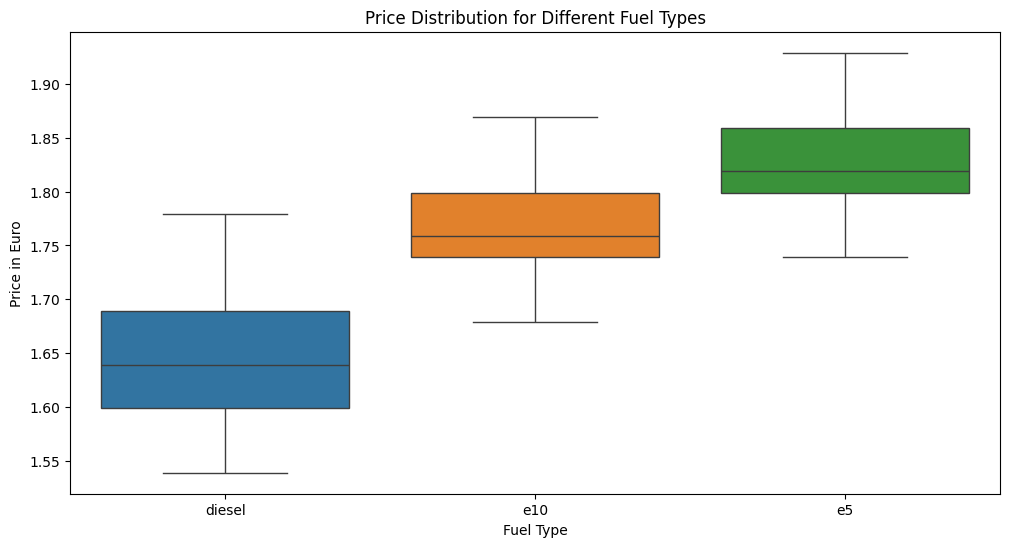

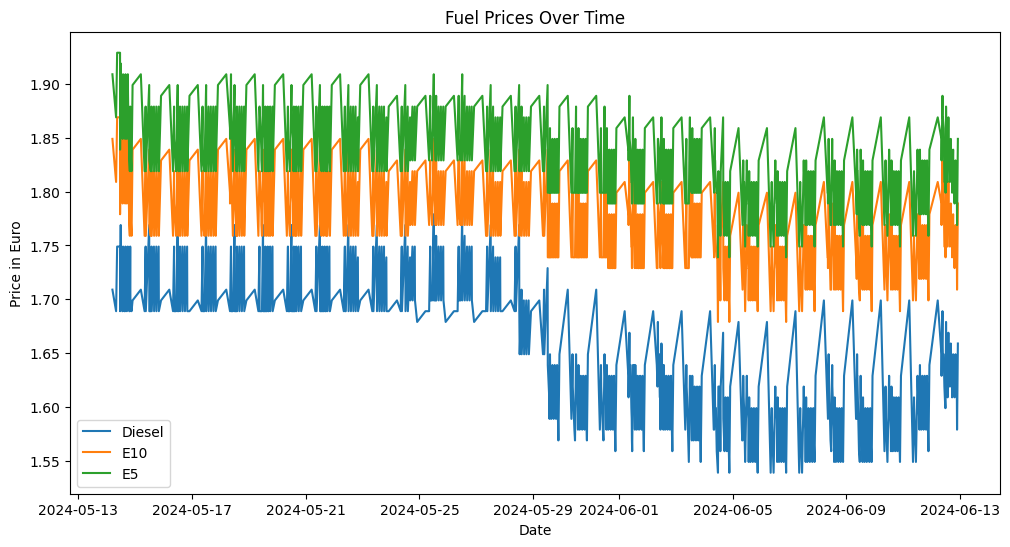

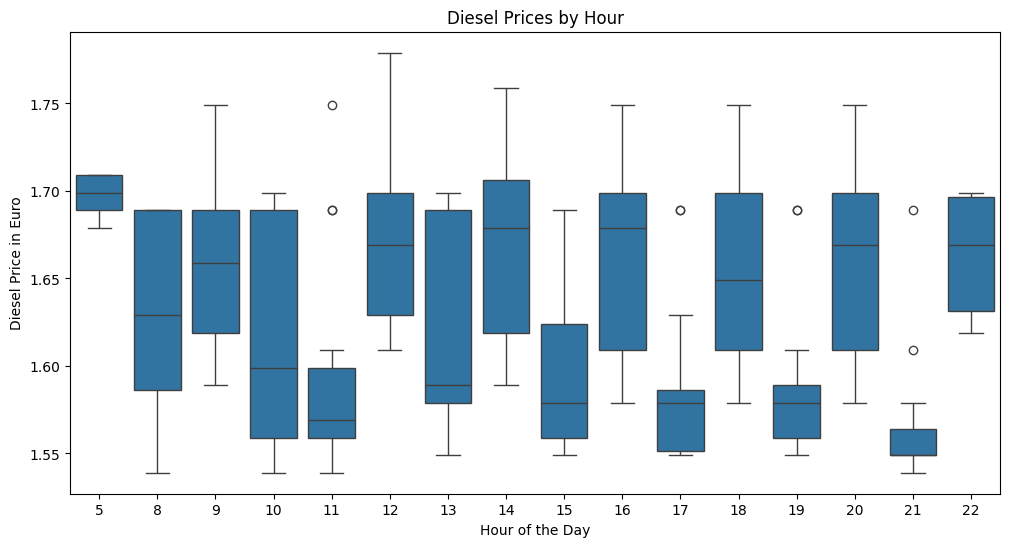

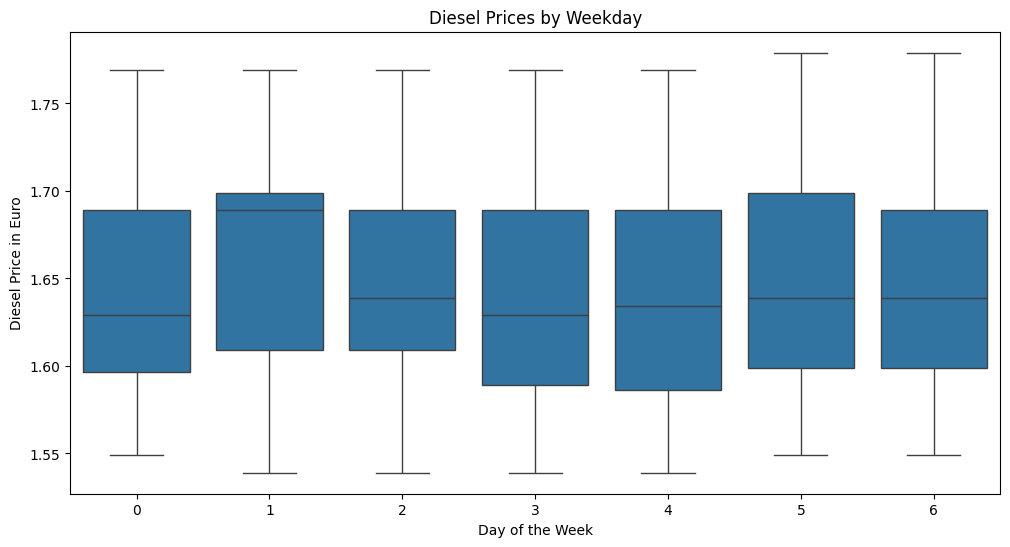

In [13]:
# Entfernen der station_uuid Spalte aus den Berechnungen
df_aral_desc = df_aral.drop(columns=['station_uuid'])

print(df_aral_desc)

# 1. Grundlegende Statistiken
basic_stats = df_aral_desc.describe()

print("Grundlegende Statistiken:")
print(basic_stats)

# 2. Durchschnittliche Preise nach Stunde
avg_price_by_hour = df_aral_desc.groupby('hour').mean()[['diesel', 'e10', 'e5']]
print("Durchschnittliche Preise nach Stunde:")
print(avg_price_by_hour)

# 3. Durchschnittliche Preise nach Wochentag
avg_price_by_weekday = df_aral_desc.groupby('weekday').mean()[['diesel', 'e10', 'e5']]
print("Durchschnittliche Preise nach Wochentag:")
print(avg_price_by_weekday)

# 4. Standardabweichung der Preise nach Stunde
std_price_by_hour = df_aral_desc.groupby('hour').std()[['diesel', 'e10', 'e5']]
print("Standardabweichung der Preise nach Stunde:")
print(std_price_by_hour)

# 5. Standardabweichung der Preise nach Wochentag
std_price_by_weekday = df_aral_desc.groupby('weekday').std()[['diesel', 'e10', 'e5']]
print("Standardabweichung der Preise nach Wochentag:")
print(std_price_by_weekday)

# 6. Anzahl der Preisänderungen
price_changes = df_aral_desc[['dieselchange', 'e10change', 'e5change']].sum
print("Anzahl der Preisänderungen:")
print(price_changes)

# 7. Minimale und maximale Preise nach Stunde
min_price_by_hour = df_aral_desc.groupby('hour').min()[['diesel', 'e10', 'e5']]
max_price_by_hour = df_aral_desc.groupby('hour').max()[['diesel', 'e10', 'e5']]
print("Minimale Preise nach Stunde:")
print(min_price_by_hour)
print("Maximale Preise nach Stunde:")
print(max_price_by_hour)

# 8. Minimale und maximale Preise nach Wochentag
min_price_by_weekday = df_aral_desc.groupby('weekday').min()[['diesel', 'e10', 'e5']]
max_price_by_weekday = df_aral_desc.groupby('weekday').max()[['diesel', 'e10', 'e5']]
print("Minimale Preise nach Wochentag:")
print(min_price_by_weekday)
print("Maximale Preise nach Wochentag:")
print(max_price_by_weekday)

# 9. Visualisierungen

# Boxplot der Preise nach Kraftstoffart
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_aral_desc[['diesel', 'e10', 'e5']])
plt.title('Price Distribution for Different Fuel Types')
plt.xlabel('Fuel Type')
plt.ylabel('Price in Euro')
plt.show()

# Zeitreihenplot der Preise
plt.figure(figsize=(12, 6))
plt.plot(df_aral_desc['date'], df_aral_desc['diesel'], label='Diesel')
plt.plot(df_aral_desc['date'], df_aral_desc['e10'], label='E10')
plt.plot(df_aral_desc['date'], df_aral_desc['e5'], label='E5')
plt.title('Fuel Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price in Euro')
plt.legend()
plt.show()

# Boxplot der Preise nach Stunde
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='diesel', data=df_aral_desc)
plt.title('Diesel Prices by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Diesel Price in Euro')
plt.show()

# Boxplot der Preise nach Wochentag
plt.figure(figsize=(12, 6))
sns.boxplot(x='weekday', y='diesel', data=df_aral_desc)
plt.title('Diesel Prices by Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Diesel Price in Euro')
plt.show()


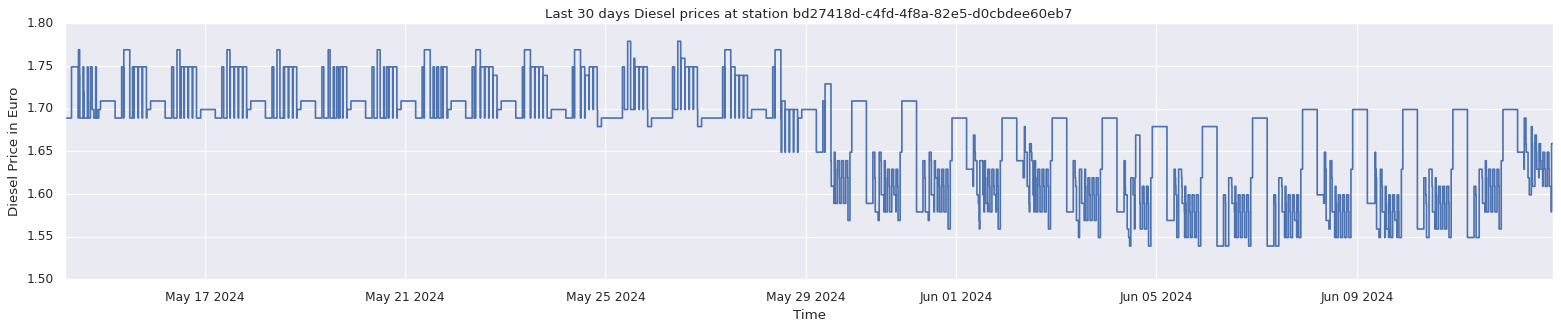

In [14]:
plt.style.use('classic')
sns.set()

plt.figure(figsize=(24, 4))
plt.step(df_aral.date, df_aral.diesel, where='pre')
# Adding titles and labels
plt.title('Last ' + str(days) + ' days Diesel prices at station ' + id)
plt.xlabel('Time')
plt.ylabel('Diesel Price in Euro')

# Show the plot
plt.show()

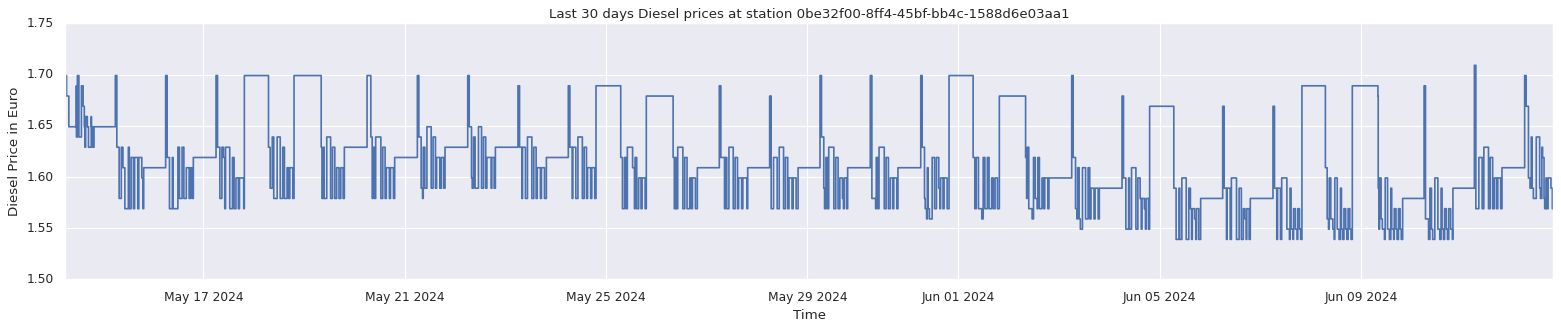

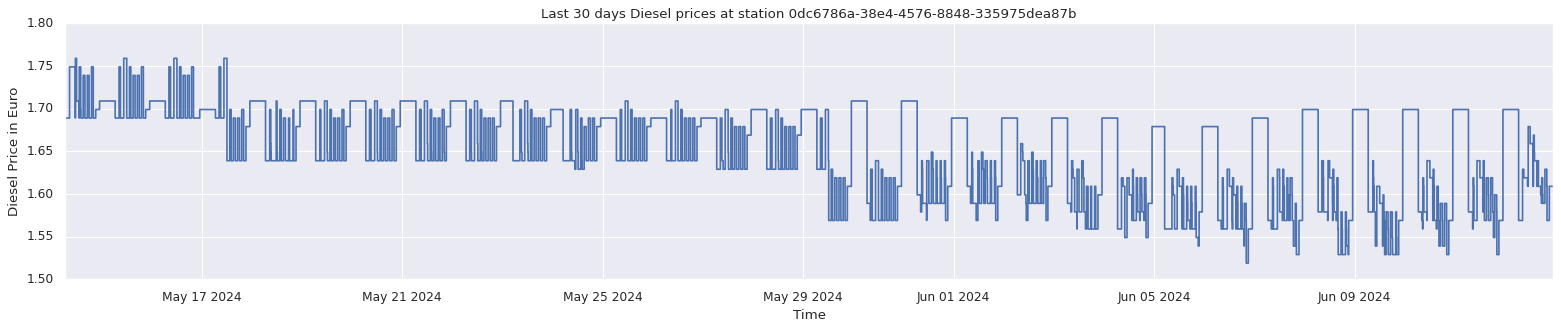

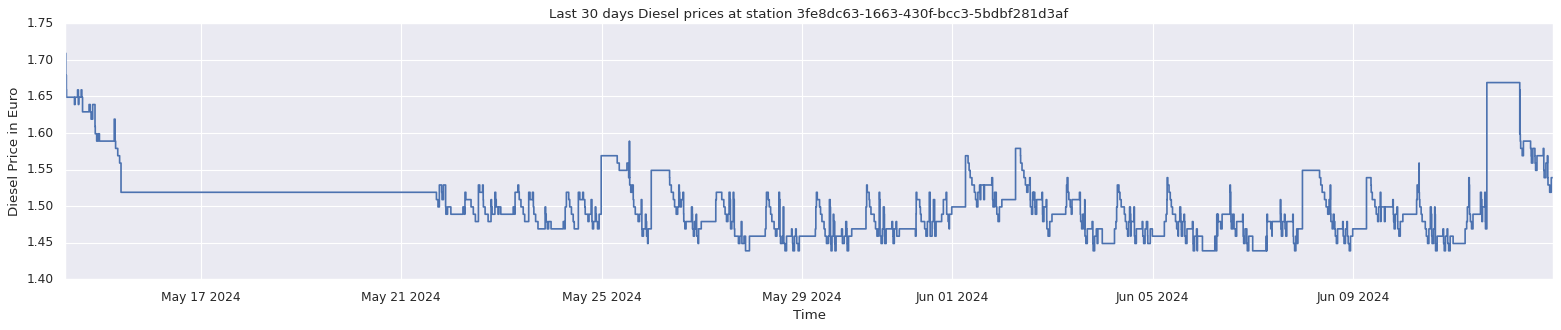

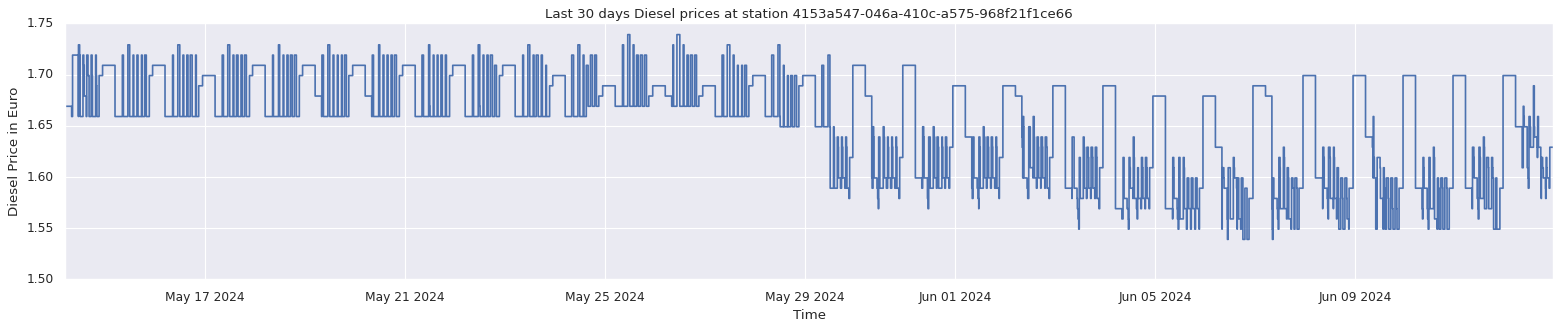

No data for station 51d4b5ba-a095-1aa0-e100-80009459e03a


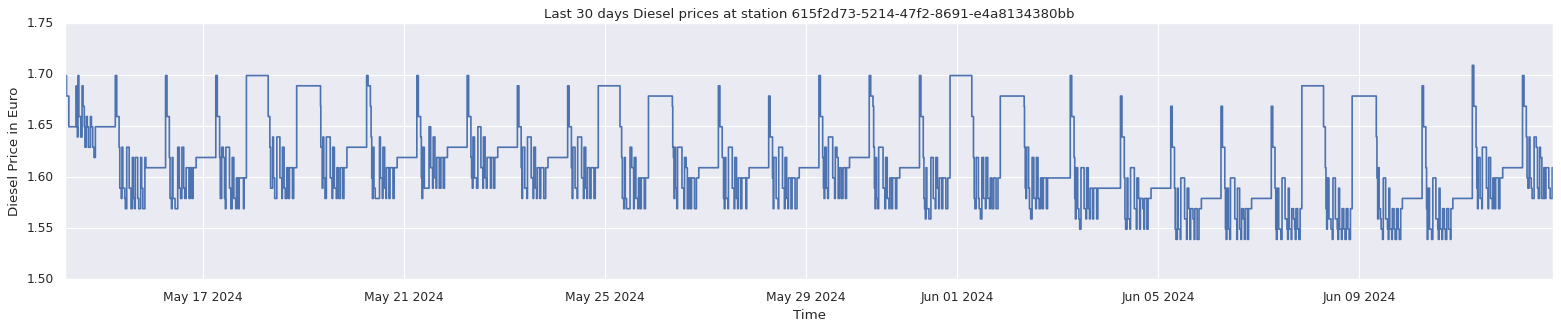

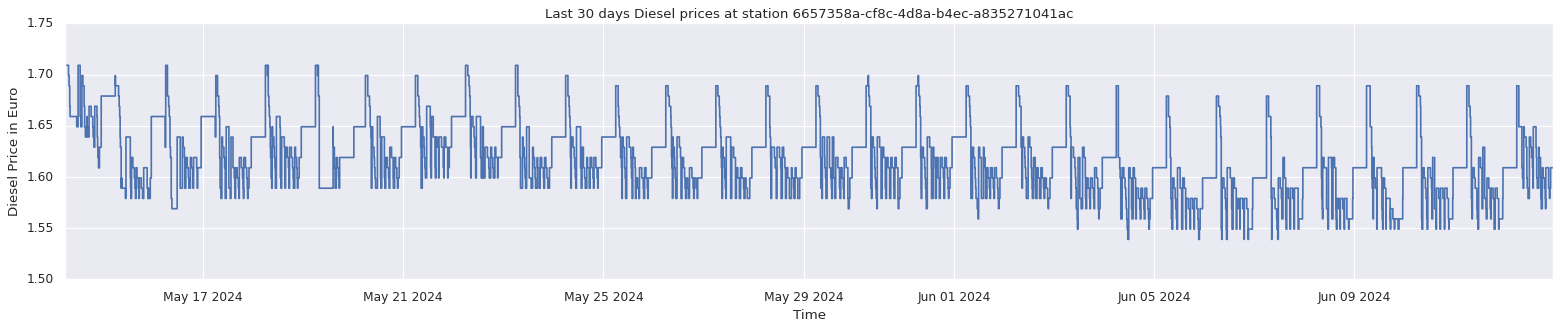

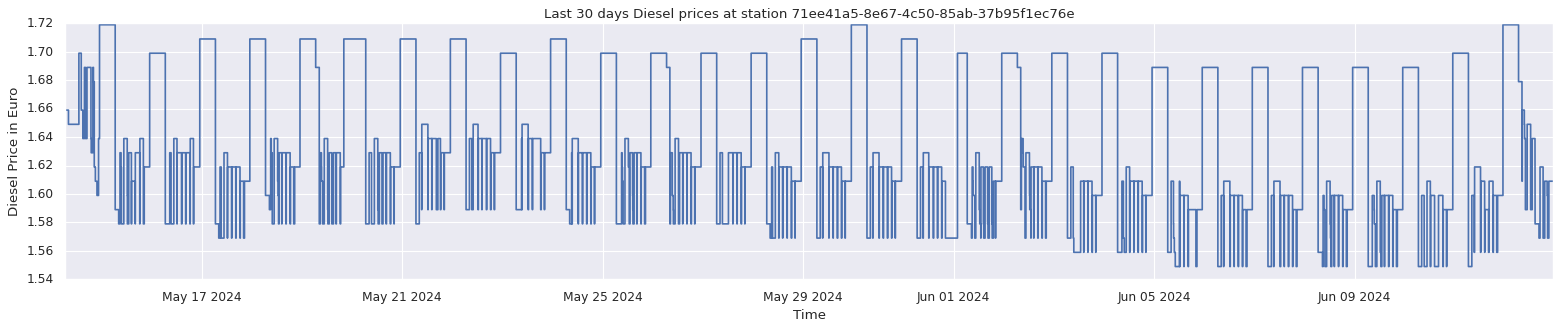

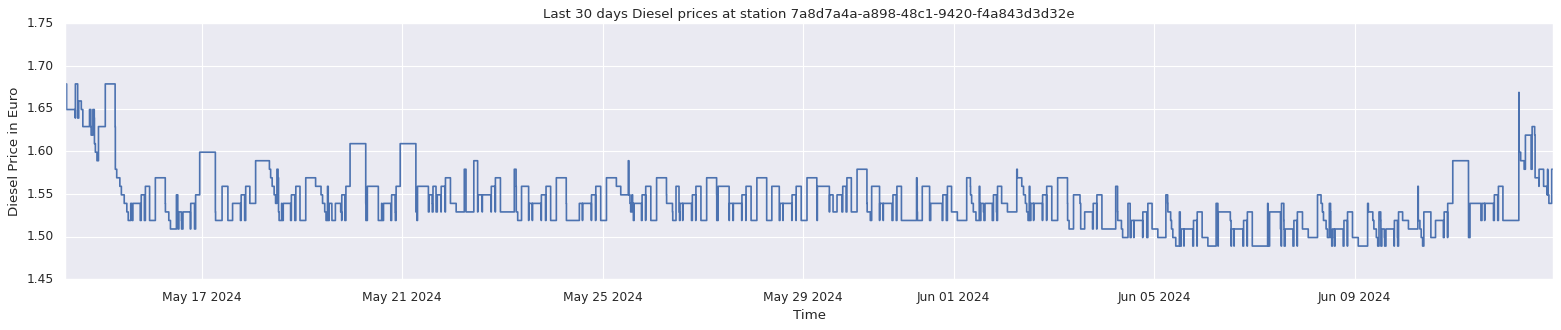

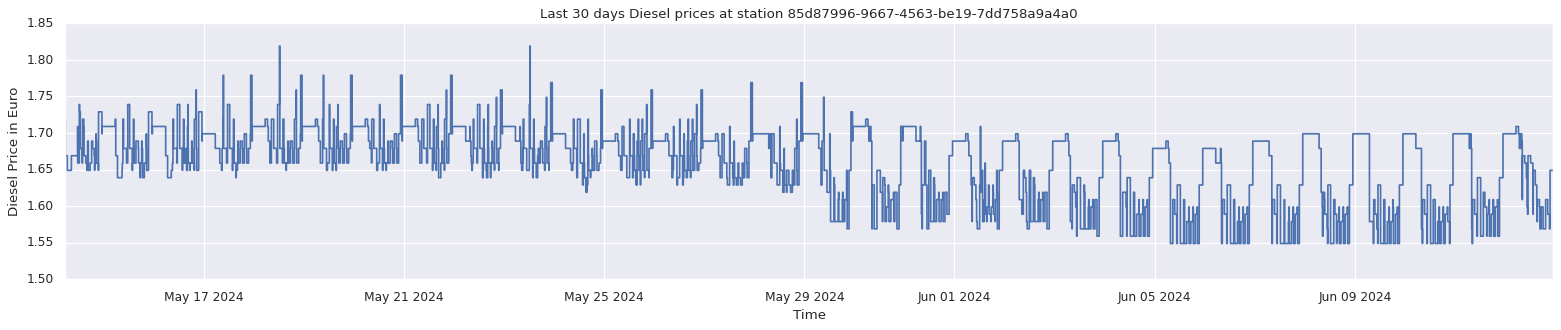

No data for station 8cf0e749-5ebc-4e51-a968-0a40c9d6ac9f


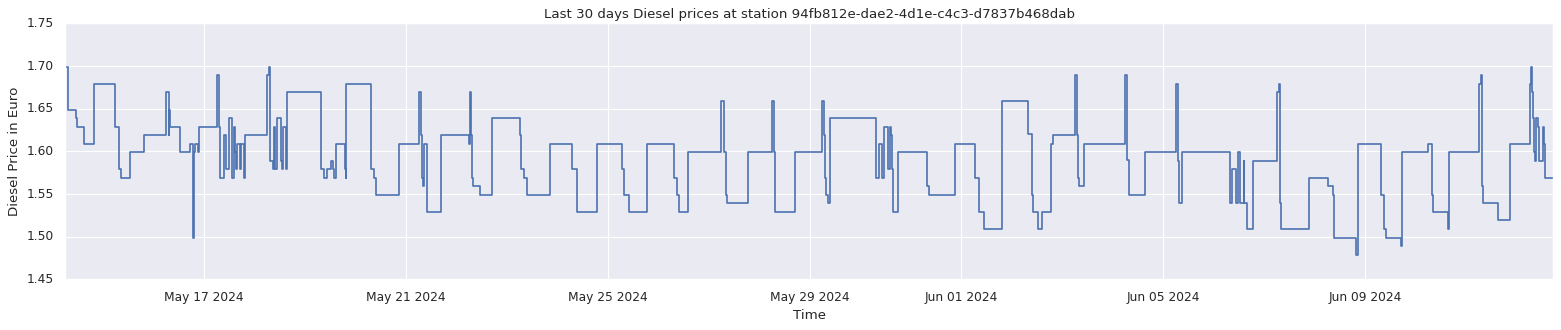

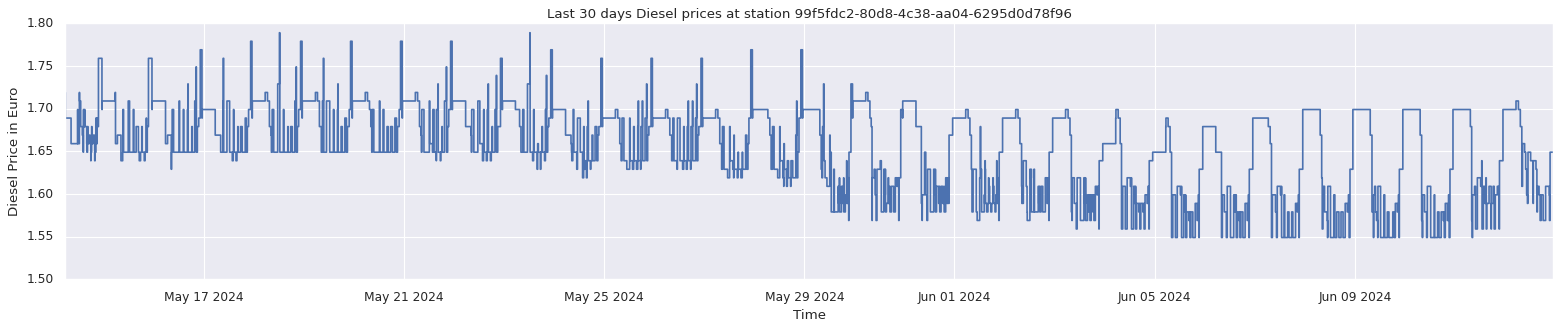

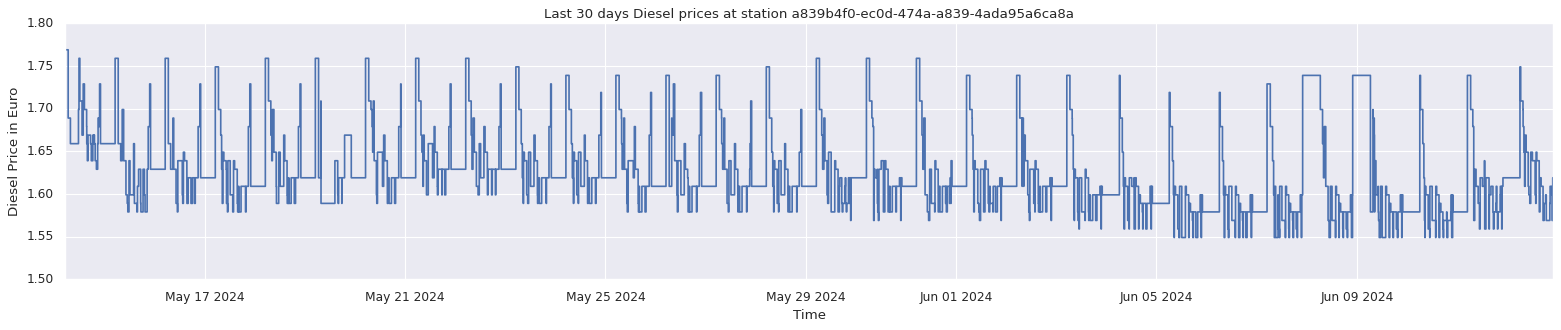

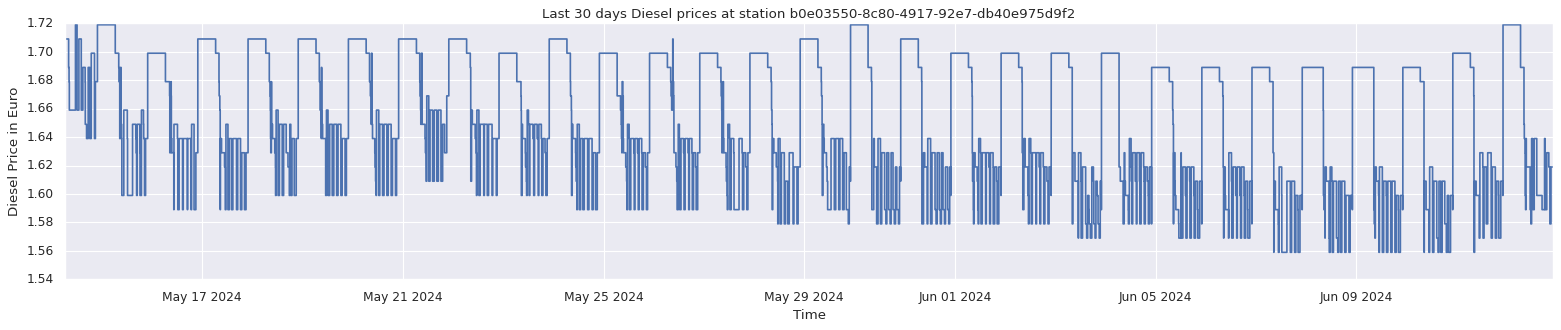

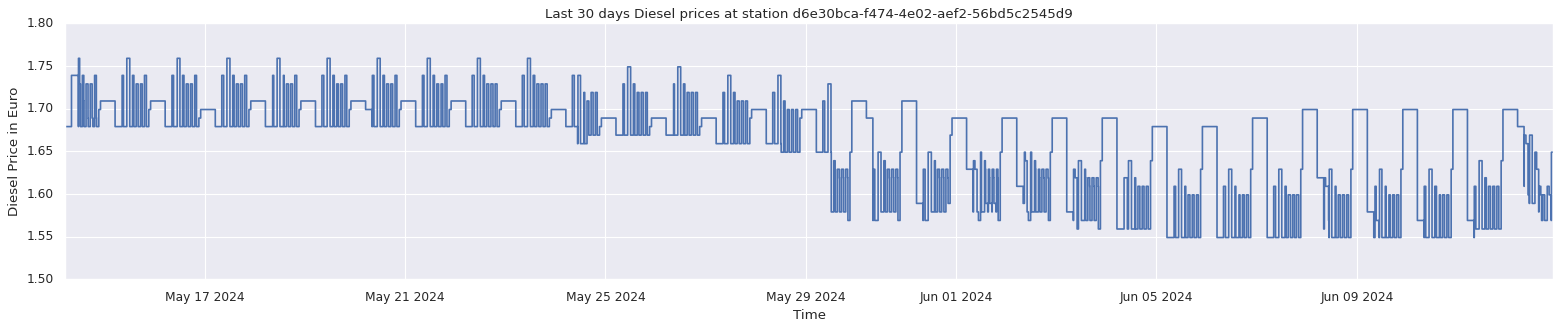

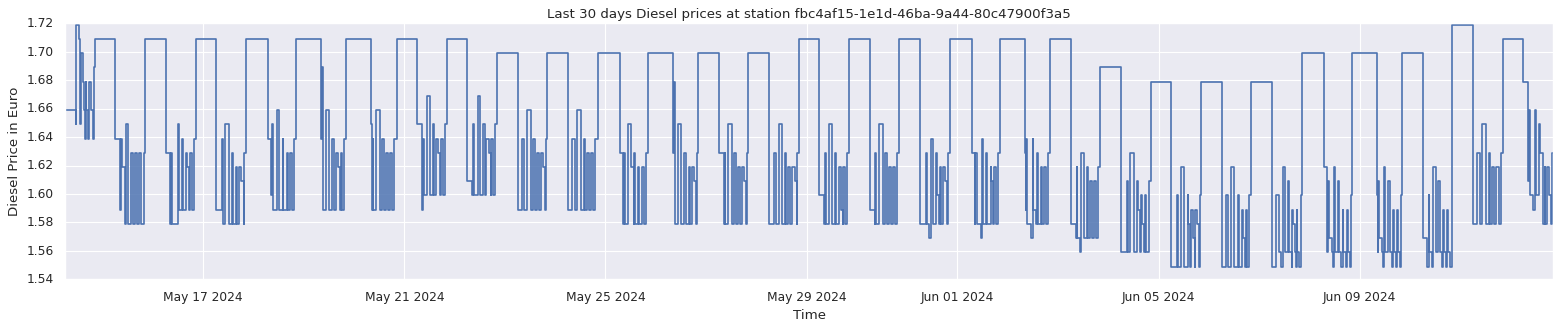

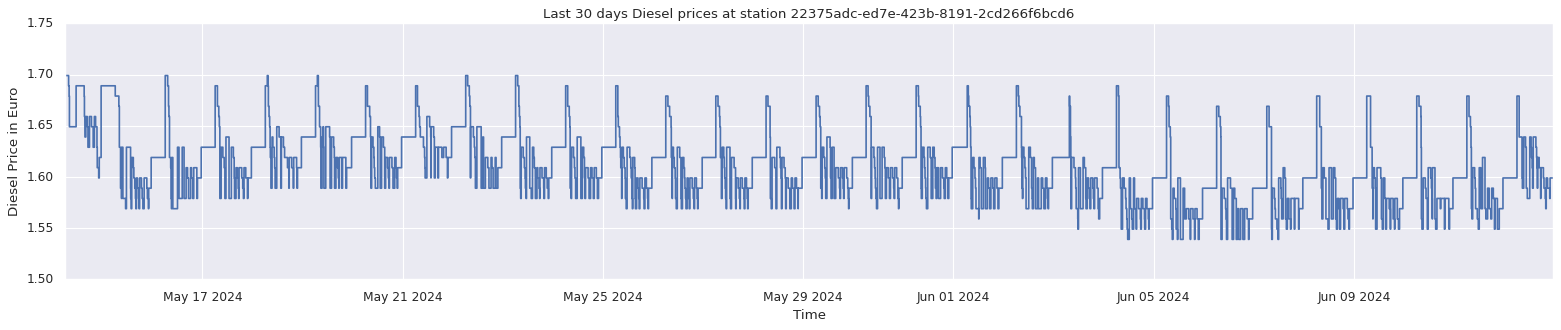

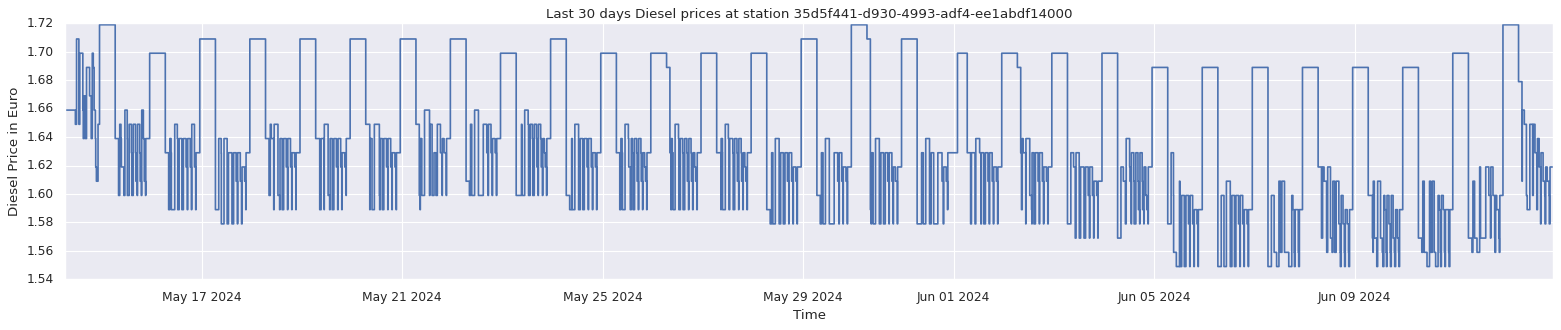

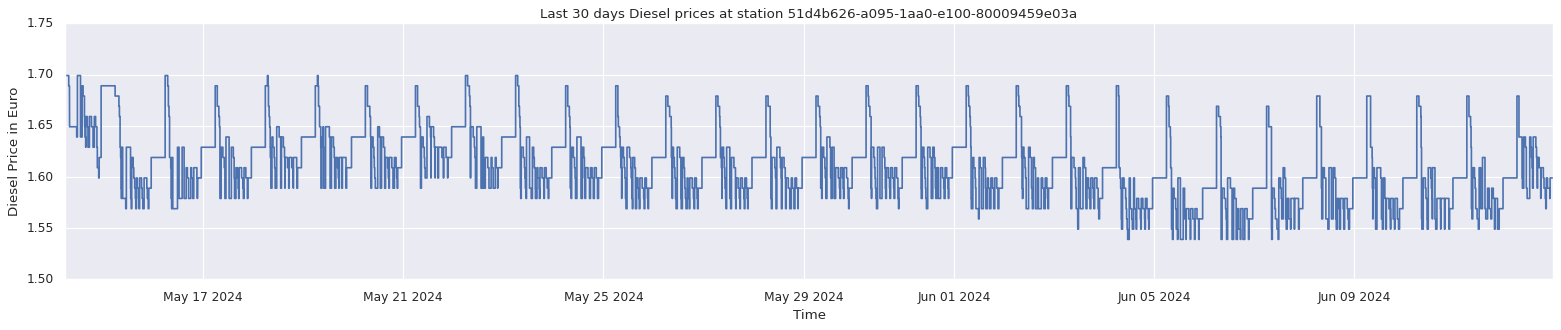

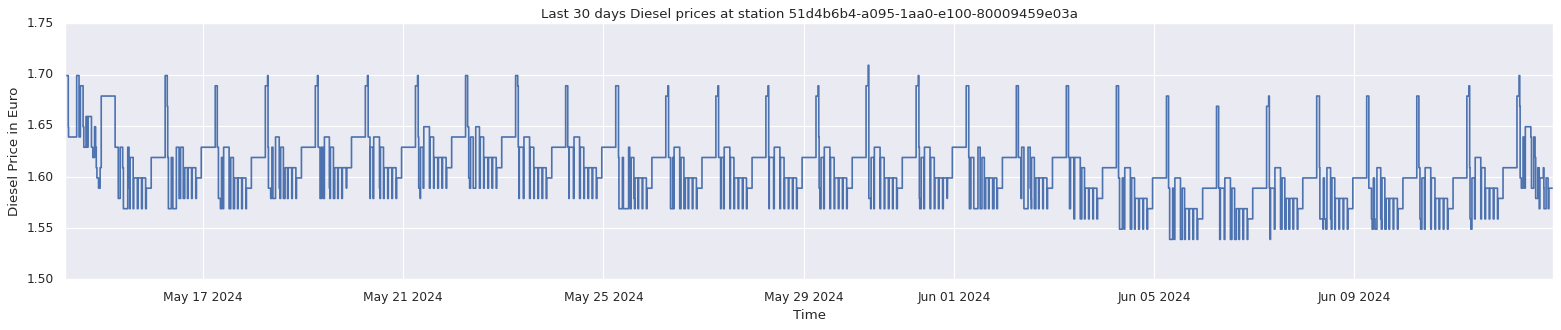

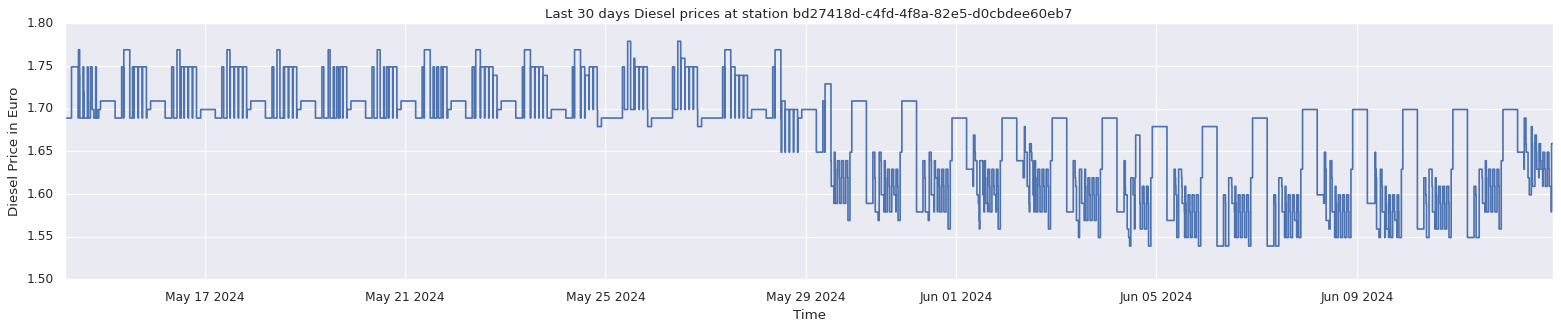

In [15]:
# Style settings for plots
plt.style.use('classic')
sns.set()

# Loop through all station IDs in Pforzheim
for station_id in ids_pf:
    # Filter data for the current station
    df = data[data.station_uuid == station_id]

    # Check if there is data for the station
    if df.empty:
        print(f"No data for station {station_id}")
        continue

    # Creating the plot
    plt.figure(figsize=(24, 4))
    plt.step(df.date, df.diesel, where='pre')

    # Adding titles and labels
    plt.title('Last ' + str(days) + ' days Diesel prices at station ' + station_id)
    plt.xlabel('Time')
    plt.ylabel('Diesel Price in Euro')

    # Show the plot
    plt.show()

In [22]:
#Prüfen der Stationen mit fehlenden Werten
df_test1 = data[data.station_uuid == "8cf0e749-5ebc-4e51-a968-0a40c9d6ac9f"]
print(df_test1.head)

df_test2 = data[data.station_uuid == "51d4b5ba-a095-1aa0-e100-80009459e03a"]
print(df_test2.head)

<bound method NDFrame.head of Empty DataFrame
Columns: [date, station_uuid, diesel, e5, e10, dieselchange, e5change, e10change, hour, weekday, minute]
Index: []>
<bound method NDFrame.head of Empty DataFrame
Columns: [date, station_uuid, diesel, e5, e10, dieselchange, e5change, e10change, hour, weekday, minute]
Index: []>


In [23]:
ids_pf_new = ["0be32f00-8ff4-45bf-bb4c-1588d6e03aa1", "0dc6786a-38e4-4576-8848-335975dea87b", "3fe8dc63-1663-430f-bcc3-5bdbf281d3af", "4153a547-046a-410c-a575-968f21f1ce66", "615f2d73-5214-47f2-8691-e4a8134380bb", "6657358a-cf8c-4d8a-b4ec-a835271041ac","71ee41a5-8e67-4c50-85ab-37b95f1ec76e", "7a8d7a4a-a898-48c1-9420-f4a843d3d32e", "85d87996-9667-4563-be19-7dd758a9a4a0","94fb812e-dae2-4d1e-c4c3-d7837b468dab", "99f5fdc2-80d8-4c38-aa04-6295d0d78f96", "a839b4f0-ec0d-474a-a839-4ada95a6ca8a", "b0e03550-8c80-4917-92e7-db40e975d9f2", "d6e30bca-f474-4e02-aef2-56bd5c2545d9", "fbc4af15-1e1d-46ba-9a44-80c47900f3a5", "22375adc-ed7e-423b-8191-2cd266f6bcd6", "35d5f441-d930-4993-adf4-ee1abdf14000", "51d4b626-a095-1aa0-e100-80009459e03a", "51d4b6b4-a095-1aa0-e100-80009459e03a", "bd27418d-c4fd-4f8a-82e5-d0cbdee60eb7"]

In [45]:
# Filtern des Datensatzes nach den IDs in ids_pf
df_pf = data[data['station_uuid'].isin(ids_pf_new)]

In [48]:
# Berechnung der Durchschnittspreise nach Stunde für Diesel
avg_price_by_hour_diesel = df_pf.groupby(['station_uuid', 'hour']).diesel.mean().unstack()

# Berechnung der Durchschnittspreise nach Wochentag für Diesel
avg_price_by_weekday_diesel = df_pf.groupby(['station_uuid', 'weekday']).diesel.mean().unstack()

# Berechnung der Durchschnittspreise nach Stunde für E10
avg_price_by_hour_e10 = df_pf.groupby(['station_uuid', 'hour']).e10.mean().unstack()

# Berechnung der Durchschnittspreise nach Wochentag für E10
avg_price_by_weekday_e10 = df_pf.groupby(['station_uuid', 'weekday']).e10.mean().unstack()

# Berechnung der Durchschnittspreise nach Stunde für E5
avg_price_by_hour_e5 = df_pf.groupby(['station_uuid', 'hour']).e5.mean().unstack()

# Berechnung der Durchschnittspreise nach Wochentag für E5
avg_price_by_weekday_e5 = df_pf.groupby(['station_uuid', 'weekday']).e5.mean().unstack()

# Berechnung der minimalen und maximalen Preise nach Stunde für Diesel
min_price_by_hour_diesel = df_pf.groupby(['station_uuid', 'hour']).diesel.min().unstack()
max_price_by_hour_diesel = df_pf.groupby(['station_uuid', 'hour']).diesel.max().unstack()

# Berechnung der minimalen und maximalen Preise nach Wochentag für Diesel
min_price_by_weekday_diesel = df_pf.groupby(['station_uuid', 'weekday']).diesel.min().unstack()
max_price_by_weekday_diesel = df_pf.groupby(['station_uuid', 'weekday']).diesel.max().unstack()

# Berechnung der minimalen und maximalen Preise nach Stunde für E10
min_price_by_hour_e10 = df_pf.groupby(['station_uuid', 'hour']).e10.min().unstack()
max_price_by_hour_e10 = df_pf.groupby(['station_uuid', 'hour']).e10.max().unstack()

# Berechnung der minimalen und maximalen Preise nach Wochentag für E10
min_price_by_weekday_e10 = df_pf.groupby(['station_uuid', 'weekday']).e10.min().unstack()
max_price_by_weekday_e10 = df_pf.groupby(['station_uuid', 'weekday']).e10.max().unstack()

# Berechnung der minimalen und maximalen Preise nach Stunde für E5
min_price_by_hour_e5 = df_pf.groupby(['station_uuid', 'hour']).e5.min().unstack()
max_price_by_hour_e5 = df_pf.groupby(['station_uuid', 'hour']).e5.max().unstack()

# Berechnung der minimalen und maximalen Preise nach Wochentag für E5
min_price_by_weekday_e5 = df_pf.groupby(['station_uuid', 'weekday']).e5.min().unstack()
max_price_by_weekday_e5 = df_pf.groupby(['station_uuid', 'weekday']).e5.max().unstack()

# Berechnung der Standardabweichung der Preise
std_price_diesel = df_pf.groupby('station_uuid').diesel.std()
std_price_e10 = df_pf.groupby('station_uuid').e10.std()
std_price_e5 = df_pf.groupby('station_uuid').e5.std()

# Berechnung der Anzahl der Preisänderungen
price_changes_diesel = df_pf.groupby('station_uuid')['dieselchange'].sum()
price_changes_e10 = df_pf.groupby('station_uuid')['e10change'].sum()
price_changes_e5 = df_pf.groupby('station_uuid')['e5change'].sum()


In [49]:
# Initialisiere das DataFrame mit einem der berechneten DataFrames, z.B. avg_price_by_hour_diesel
features = avg_price_by_hour_diesel.copy()

# Benenne die Spalten um, um Konflikte zu vermeiden
features.columns = [f'avg_price_by_hour_diesel_{col}' for col in features.columns]

# Definiere eine Funktion zum Zusammenführen und Umbenennen von DataFrames
def merge_and_rename(df, name, features):
    df = df.copy()
    df.columns = [f'{name}_{col}' for col in df.columns]
    return features.merge(df, left_index=True, right_index=True, how='left')

# Führe die DataFrames zusammen und benenne die Spalten entsprechend um
features = merge_and_rename(avg_price_by_weekday_diesel, 'avg_price_by_weekday_diesel', features)
features = merge_and_rename(avg_price_by_hour_e10, 'avg_price_by_hour_e10', features)
features = merge_and_rename(avg_price_by_weekday_e10, 'avg_price_by_weekday_e10', features)
features = merge_and_rename(avg_price_by_hour_e5, 'avg_price_by_hour_e5', features)
features = merge_and_rename(avg_price_by_weekday_e5, 'avg_price_by_weekday_e5', features)
features = merge_and_rename(min_price_by_hour_diesel, 'min_price_by_hour_diesel', features)
features = merge_and_rename(max_price_by_hour_diesel, 'max_price_by_hour_diesel', features)
features = merge_and_rename(min_price_by_weekday_diesel, 'min_price_by_weekday_diesel', features)
features = merge_and_rename(max_price_by_weekday_diesel, 'max_price_by_weekday_diesel', features)
features = merge_and_rename(min_price_by_hour_e10, 'min_price_by_hour_e10', features)
features = merge_and_rename(max_price_by_hour_e10, 'max_price_by_hour_e10', features)
features = merge_and_rename(min_price_by_weekday_e10, 'min_price_by_weekday_e10', features)
features = merge_and_rename(max_price_by_weekday_e10, 'max_price_by_weekday_e10', features)
features = merge_and_rename(min_price_by_hour_e5, 'min_price_by_hour_e5', features)
features = merge_and_rename(max_price_by_hour_e5, 'max_price_by_hour_e5', features)
features = merge_and_rename(min_price_by_weekday_e5, 'min_price_by_weekday_e5', features)
features = merge_and_rename(max_price_by_weekday_e5, 'max_price_by_weekday_e5', features)

# Standardabweichung und Preisänderungen hinzufügen
features['std_price_diesel'] = std_price_diesel
features['std_price_e10'] = std_price_e10
features['std_price_e5'] = std_price_e5
features['price_changes_diesel'] = price_changes_diesel
features['price_changes_e10'] = price_changes_e10
features['price_changes_e5'] = price_changes_e5

# Zeige die ersten Zeilen des Features DataFrame
print(features)

# Entfernen von Zeilen mit fehlenden Werten
features_clean = features.dropna()

print(features_clean)


                                      avg_price_by_hour_diesel_0  \
station_uuid                                                       
0be32f00-8ff4-45bf-bb4c-1588d6e03aa1                         NaN   
0dc6786a-38e4-4576-8848-335975dea87b                         NaN   
22375adc-ed7e-423b-8191-2cd266f6bcd6                         NaN   
35d5f441-d930-4993-adf4-ee1abdf14000                         NaN   
3fe8dc63-1663-430f-bcc3-5bdbf281d3af                         NaN   
4153a547-046a-410c-a575-968f21f1ce66                         NaN   
51d4b626-a095-1aa0-e100-80009459e03a                         NaN   
51d4b6b4-a095-1aa0-e100-80009459e03a                         NaN   
615f2d73-5214-47f2-8691-e4a8134380bb                         NaN   
6657358a-cf8c-4d8a-b4ec-a835271041ac                       1.619   
71ee41a5-8e67-4c50-85ab-37b95f1ec76e                         NaN   
7a8d7a4a-a898-48c1-9420-f4a843d3d32e                         NaN   
85d87996-9667-4563-be19-7dd758a9a4a0            

In [50]:
# Spalten mit nur NaNs identifizieren
columns_with_only_nans = features.columns[features.isna().all()].tolist()

print(columns_with_only_nans)

[]


Anzahl der NaNs nach der Imputation: 0
Für 2 Cluster: Silhouette Score = 0.27938931681469814
Für 3 Cluster: Silhouette Score = 0.2507647084206035
Für 4 Cluster: Silhouette Score = 0.2170027245949881
Für 5 Cluster: Silhouette Score = 0.19331569932132725
Für 6 Cluster: Silhouette Score = 0.18023807813743944
Für 7 Cluster: Silhouette Score = 0.1195762023900729
Für 8 Cluster: Silhouette Score = 0.1767910105939325
Für 9 Cluster: Silhouette Score = 0.18876930998985286
Für 10 Cluster: Silhouette Score = 0.19421019929646327


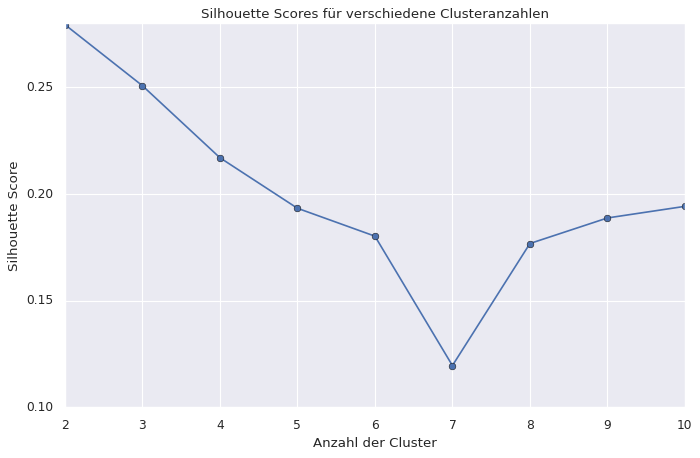

In [54]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Angenommen, features ist dein DataFrame mit NaN-Werten

# Imputer erstellen und anwenden (Mittelwert-Imputation)
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features)

# Umwandlung zurück in ein DataFrame
features_imputed = pd.DataFrame(features_imputed, columns=features.columns, index=features.index)

# Überprüfen, ob alle NaNs entfernt wurden
print("Anzahl der NaNs nach der Imputation:", features_imputed.isna().sum().sum())  # Sollte 0 ausgeben

# Standardisierung der Features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed)

# Liste zur Speicherung der Silhouette Scores
silhouette_scores = []

# Teste Clusteranzahlen von 2 bis 10
for n_clusters in range(2, 11):
    # KMeans Clusteranalyse durchführen
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto').fit(features_scaled)
    cluster_labels = kmeans.labels_

    # Berechnung der Silhouette Scores
    score = silhouette_score(features_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f'Für {n_clusters} Cluster: Silhouette Score = {score}')

# Plot der Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores für verschiedene Clusteranzahlen')
plt.xlabel('Anzahl der Cluster')
plt.ylabel('Silhouette Score')
plt.show()


In [52]:
# Bestimmung der optimalen Anzahl der Cluster
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2

print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


In [56]:
# Durchführung der Clusteranalyse mit der optimalen Anzahl von Clustern
kmeans = KMeans(n_clusters=optimal_k, n_init=10)
kmeans.fit(features_scaled)

# Hinzufügen der Cluster-Labels zum DataFrame
features['cluster'] = kmeans.labels_

In [57]:
# Überprüfen, welche Tankstelle in welchem Cluster ist
print(features[['station_uuid', 'cluster']])

KeyError: "['station_uuid'] not in index"